In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_input = 'Master Data 2015.csv'
listings = pd.read_csv(file_input)
listings['zipcode'] = pd.to_numeric(listings['zipcode'])
by_zipcode = listings.groupby('zipcode').count()
by_zipcode = by_zipcode.sort_values('id', ascending=False)
by_zipcode.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
zipcode,,,,,,,,,,,,,,,,,
11211,12503,12503,12503,9496,12500,12500,12503,12503,12503,12503,12503,12503,9941,9941,12503,12502,12503
10002,9224,9224,9224,9094,9221,9221,9224,9224,9224,9224,9224,9224,7340,7340,9224,9224,9224
10009,9081,9081,9081,8794,9080,9080,9081,9081,9081,9081,9081,9081,7046,7046,9081,9081,9081
10003,8404,8404,8404,7764,8403,8403,8404,8404,8404,8404,8404,8404,6520,6520,8404,8404,8404
11206,7572,7572,7572,6201,7572,7572,7572,7572,7572,7572,7572,7572,5698,5698,7572,7572,7572
11238,7128,7128,7128,7024,7119,7119,7128,7128,7128,7128,7128,7128,5430,5430,7128,7128,7128
11221,6615,6615,6615,5985,6615,6615,6615,6615,6615,6615,6615,6615,4789,4789,6615,6615,6615
10011,6488,6488,6488,6429,6487,6487,6488,6488,6488,6488,6488,6488,5017,5017,6488,6488,6488
11216,6283,6283,6283,5524,6283,6283,6283,6283,6283,6283,6283,6283,4776,4776,6283,6283,6283


In [9]:
zip_list = list(by_zipcode.index.values)
zipcodes = zip_list[0:30]
means = []
medians = []

for zipcode in zipcodes:
    median = listings.loc[listings['zipcode']==zipcode]['price'].median()
    mean = listings.loc[listings['zipcode']==zipcode]['price'].mean()
    means.append(mean)
    medians.append(median)

zipcode_prices = pd.DataFrame({
    'Zip Code':zipcodes,
    'Mean': means,
    'Median': medians
})
zipcode_prices



,Zip Code,Mean,Median
0,11211,150.991682,129.0
1,10002,182.400477,150.0
2,10009,177.778549,150.0
3,10003,220.328891,180.0
4,11206,102.391970,80.0
5,11238,144.082211,120.0
6,11221,95.713076,75.0
7,10011,242.854346,200.0
8,11216,111.900207,90.0
9,10014,252.500823,210.0


Text(0.5,1,'Mean and Median Prices by Zipcode')

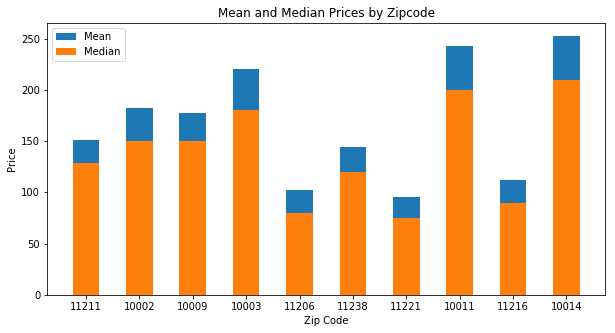

In [36]:
# Plot Mean and Median
plt.figure(figsize = (10,5))
x_axis = np.arange(len(zipcode_prices['Zip Code']))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, zipcode_prices['Zip Code'])
plt.bar(x_axis, zipcode_prices['Mean'], label ='Mean',width = 0.5)
plt.bar(x_axis, zipcode_prices['Median'], label = 'Median',width = 0.5)
plt.legend(loc='best')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.title('Mean and Median Prices by Zipcode')

In [37]:
# Create Data Frame with specified zipcodes
frames = []

for zipcode in zipcodes:
    one_zip = listings.loc[listings['zipcode']==zipcode]
    frames.append(one_zip)

by_zip = pd.concat(frames)
by_zip

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year_month
44,1692262,Open Design Williamsburg Loft,8939428,Margo & Dave,NaN,NaN,11211,40.710927,-73.969512,Entire home/apt,269,2,58,4/6/2015,3.20,1,262.0,201505
105,2454713,"Sunny, Spacious 1BR apt- City views",9166868,Tom And Anna,NaN,NaN,11211,40.713027,-73.968905,Entire home/apt,210,2,18,4/28/2015,1.40,1,102.0,201505
183,2756733,BEAUTIFUL PRIVATE ROOM IN BROOKLYN,1711182,Allon,Brooklyn,Williamsburg,11211,40.712475,-73.945975,Private room,70,1,7,7/4/2014,0.60,1,118.0,201505
184,4623894,Huge Room in S. Williamsburg,23948611,Hannah,Brooklyn,Williamsburg,11211,40.709796,-73.954458,Private room,80,1,0,NaN,NaN,1,151.0,201505
185,3767695,Huge S. Williamsburg Apt,19303055,Greg,Brooklyn,Williamsburg,11211,40.709601,-73.953077,Private room,200,4,1,10/5/2014,0.10,1,365.0,201505
213,3993141,Great Room in Cozy Williamsburg Apt,20699508,Brent,Brooklyn,Williamsburg,11211,40.709200,-73.955836,Private room,40,1,0,NaN,NaN,1,117.0,201505
290,1925224,"Beautiful, large, charming spot",9946315,Susan,Brooklyn,Williamsburg,11211,40.717577,-73.954302,Entire home/apt,190,6,11,1/12/2015,0.60,1,119.0,201505
300,4668531,Amazing 1BR with private terrace,756577,Jason,Brooklyn,Williamsburg,11211,40.717988,-73.951638,Entire home/apt,175,3,0,NaN,NaN,1,132.0,201505
328,2537745,Sweet Lil Williamsburg One Bedroom,4106281,Ginnie,Brooklyn,Williamsburg,11211,40.711894,-73.954685,Entire home/apt,126,1,59,4/28/2015,4.40,1,324.0,201505
363,5038425,Sunny room in Williamsburg,2163758,Leslie,Brooklyn,Williamsburg,11211,40.715368,-73.937843,Private room,60,1,5,4/9/2015,3.40,1,303.0,201505


In [43]:
# Find average prices by month
by_month = by_zip.groupby('year_month')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
year_month,,,,,,,,
201505,8923.0,172.626471,190.900931,10.0,90.0,140.0,200.0,6500.0
201506,9044.0,172.455661,174.964736,16.0,90.0,145.0,200.0,6500.0
201508,9963.0,166.117736,166.001524,10.0,89.0,139.0,199.0,6500.0
201509,9897.0,167.404769,170.256753,20.0,89.0,140.0,200.0,6500.0
201510,9776.0,168.963687,161.159099,25.0,90.0,140.0,200.0,6500.0
201511,20698.0,165.897188,157.696932,15.0,89.0,139.0,200.0,6500.0
201512,11073.0,161.413980,153.400942,15.0,85.0,130.0,199.0,6500.0


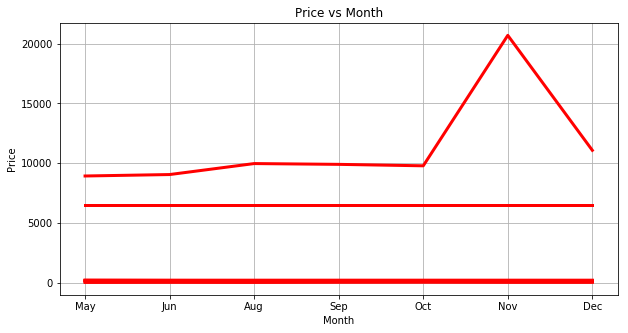

In [44]:

# Plot averages
plt.figure(figsize=(10,5))
x_axis = np.arange(len(by_month))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['May','Jun','Aug','Sep','Oct','Nov','Dec'])
plt.plot(x_axis, by_month, color='r', linewidth=3)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price vs Month')
plt.show()